# **Setup**

* https://www.youtube.com/watch?v=7MceDfpnP8k

In [14]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import shutil
import glob 

In [30]:
Folder_Input = 'Input Data'
Folder_Train = f'{Folder_Input}/Train'
Folder_Test = f'{Folder_Input}/Test'
Folder_Val = f'{Folder_Input}/Val'

# **Data Import**

## **Download Data**

In [16]:
os.chdir(Folder_Input)
# !kaggle datasets download -d preetviradiya/brian-tumor-dataset

os.chdir('..')

## **Data Review**

In [17]:
Data_Folder = f'{Folder_Input}\\brian-tumor-dataset\\Brain Tumor Data Set'
Number_of_Images = {}

for dir in os.listdir(Data_Folder):
    Number_of_Images[dir] = len(os.listdir(f'{Data_Folder}\\{dir}'))

Number_of_Images

{'Brain Tumor': 2513, 'Healthy': 2087}

In [18]:
os.listdir(Data_Folder)

['Brain Tumor', 'Healthy']

## **Train Test Split**

In [19]:
os.listdir(os.path.join(Data_Folder))

['Brain Tumor', 'Healthy']

In [20]:
# Folder_Train_Data = f'{Folder_Input}/Train Data'

# if not os.path.exists(Folder_Train_Data):
#     os.mkdir(Folder_Train_Data)
#     print(f'Created Folder {Folder_Train_Data} !','/n')

# if os.listdir(Folder_Train_Data) == []:
#     for folder in os.listdir(Data_Folder):

#         # Create Folder
#         os.mkdir(f'{Folder_Input}/Train Data/{folder}')

#         # Get List Of Files In Folder
#         Files_In_Folder = os.listdir(os.path.join(Data_Folder,folder))

#         # Select Random Files Train/Test
#         Random_Chosen_Files = np.random.choice(a= Files_In_Folder,size = int(0.7*len(Files_In_Folder)), 
#                                                replace=False)
        
#         # Copy Files to Train/Test Data Folder
#         for file in Random_Chosen_Files:
#             Source_File = os.path.join(Data_Folder,folder,file)
#             Destination_File = os.path.join(Folder_Train_Data,folder,file)
#             shutil.copy(src=Source_File,dst=Destination_File)
#         print(f'Copied {len(Random_Chosen_Files)} Files To Folder {Folder_Train_Data}/{folder}!') 
# else:
#     print(f'Folder {Folder_Train_Data} is not empty!')

In [21]:
os.listdir(Data_Folder)

['Brain Tumor', 'Healthy']

In [28]:
def Create_Data_Folder(folder_name, src_dir_path, dest_dir_path, rand_selection_prop):
    import os
    import shutil
    import numpy as np

    New_Dest_Folder_Path = f'{dest_dir_path}/{folder_name}' 

    if not os.path.exists(New_Dest_Folder_Path):
        os.mkdir(New_Dest_Folder_Path)
        print(f'Created Folder {New_Dest_Folder_Path} !')

    for folder in os.listdir(src_dir_path):

        # Create Folder
        os.mkdir(f'{New_Dest_Folder_Path}/{folder}')
        
        # Get List Of Files In Folder
        Files_In_Folder = os.listdir(os.path.join(src_dir_path,folder))
        No_Chosen_Files = int(rand_selection_prop*len(Files_In_Folder))

        # Select Random Files Train/Test
        Random_Chosen_Files = np.random.choice(a= Files_In_Folder,size = No_Chosen_Files,replace=False)
        
        # Copy Files to Train/Test Data Folder
        for file in Random_Chosen_Files:
            Source_File = os.path.join(src_dir_path,folder,file)
            Destination_File = os.path.join(New_Dest_Folder_Path,folder,file)
            shutil.copy(src=Source_File,dst=Destination_File)
        print(f'Copied {No_Chosen_Files} Files To Folder {New_Dest_Folder_Path}/{folder}!')
    print('\n')

In [29]:
# Create Train, Test & Validation Folder
Create_Data_Folder('Train',src_dir_path= Data_Folder ,dest_dir_path = Folder_Input,rand_selection_prop=0.7)
Create_Data_Folder('Test',src_dir_path= Data_Folder ,dest_dir_path = Folder_Input,rand_selection_prop=0.2)
Create_Data_Folder('Val',src_dir_path= Data_Folder ,dest_dir_path = Folder_Input,rand_selection_prop=0.1)

Created Folder Input Data/Train !
Copied 1759 Files To Folder Input Data/Train/Brain Tumor !
Copied 1460 Files To Folder Input Data/Train/Healthy !


Created Folder Input Data/Test !
Copied 502 Files To Folder Input Data/Test/Brain Tumor !
Copied 417 Files To Folder Input Data/Test/Healthy !


Created Folder Input Data/Val !
Copied 251 Files To Folder Input Data/Val/Brain Tumor !
Copied 208 Files To Folder Input Data/Val/Healthy !




# **Data Exploration**

## **Visualize Tumour Image**

(-0.5, 239.5, 299.5, -0.5)

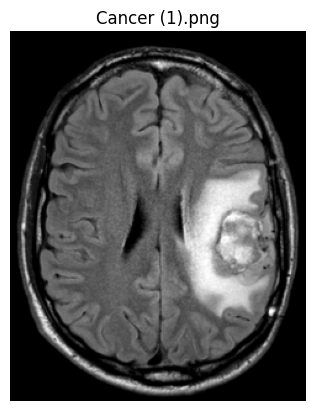

In [69]:
img = plt.imread(f'{Folder_Train}/Brain Tumor/Cancer (1).png')
plt.imshow(img,cmap='gray')
plt.title('Cancer (1).png')
plt.axis('off')

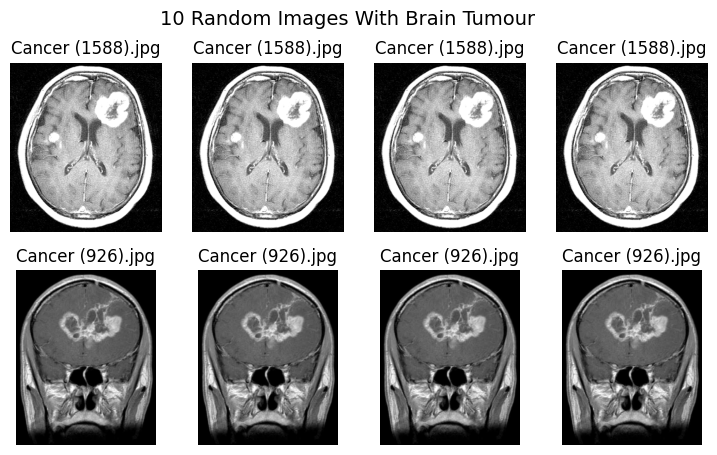

In [131]:
# # Visualize Images
# fig, axs = plt.subplots(2,4, figsize=(9,5))
# fig.suptitle('10 Random Images With Brain Tumour', fontsize=14)

# for i,img in enumerate(Tumour_Images.tolist()):
#     # print(i//4,img)
#     # for i in range(2):
#     for j in range(4):
#         img_file = plt.imread(f'{Folder_Train}/Brain Tumor/{img}')        
#         axs[i//4,j].imshow(img_file,cmap='gray')
#         axs[i//4,j].set_title(img)
#         axs[i//4,j].axis('off')

# # plt.tight_layout()
# plt.show()

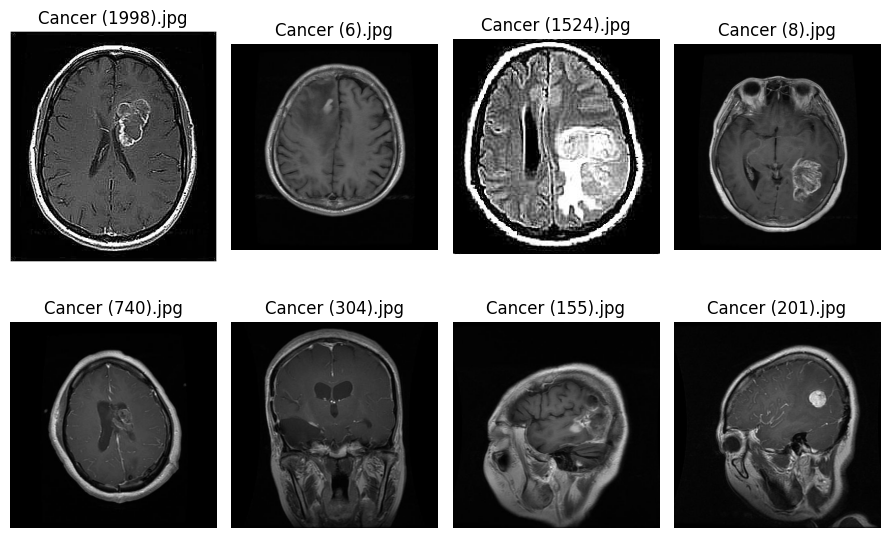

In [148]:
# Select 10 Random Images For Visualization
Tumour_Images = np.random.choice(os.listdir(f'{Folder_Train}/Brain Tumor'),8,replace=False)

# Visualize Images
plt.figure(figsize=(9,6))
# plt.title ('10 Random Images With Brain Tumour', fontsize=14)

for i,img in enumerate(Tumour_Images.tolist()):
    img_file = plt.imread(f'{Folder_Train}/Brain Tumor/{img}')       
    plt.subplot(2,4,i+1)
    plt.imshow(img_file,cmap='gray')
    plt.title(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Visualize Healthy Images**

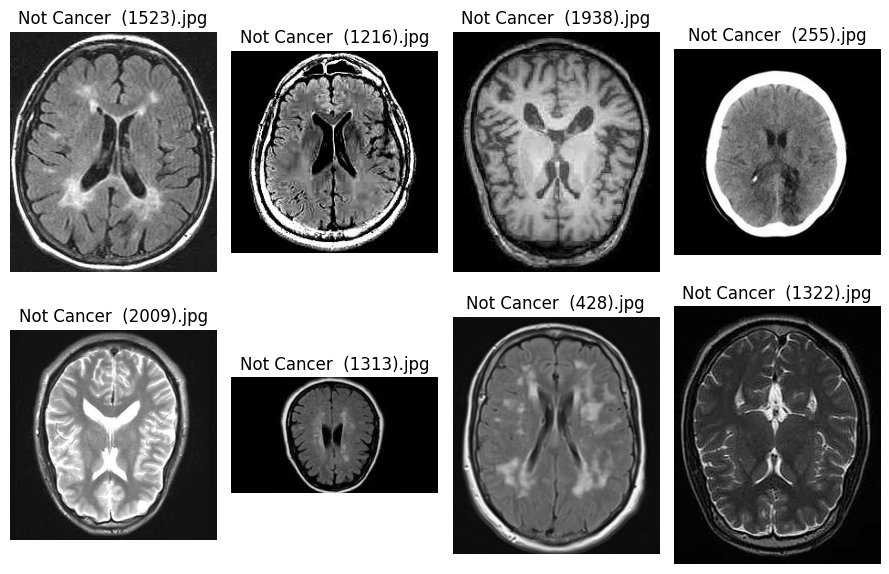

In [150]:
# Select 10 Random Images For Visualization
Healthy_Images = np.random.choice(os.listdir(f'{Folder_Train}/Healthy'),8,replace=False)

# Visualize Images
plt.figure(figsize=(9,6))
# plt.title ('10 Random Images With Brain Tumour', fontsize=14)

for i,img in enumerate(Healthy_Images.tolist()):
    img_file = plt.imread(f'{Folder_Train}/Healthy/{img}')       
    plt.subplot(2,4,i+1)
    plt.imshow(img_file,cmap='gray')
    plt.title(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Data Processing**

In [183]:
from keras.preprocessing import ImageDataGenerator

def preprocessingimages(path, size):
    image_data = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True,shear_range=0.2, rescale = 1/255)
    images = image_data.flow_from_directory(path,target_size = size, batch_size=32, class_mode='binary')
    return images

def preprocessingimages2(path, size):
    image_data = ImageDataGenerator(rescale = 1/255)
    images = image_data.flow_from_directory(path,target_size = size, batch_size=32, class_mode='binary')
    return images

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing' (c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\__init__.py)

In [170]:
Train_Data = preprocessingimages(path=Folder_Train,size=(224,224))

NameError: name 'ImageDataGenerator' is not defined

# **Classification Model**

In [181]:
import tensorflow as tf
import keras 
from keras.layers import InputLayer, Layer,Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image\__init__.py)

In [161]:
Model = Sequential()

Model.add(InputLayer(shape = (256,256,3)))
Model.add(Conv2D(filters=16, kernel_size=(3,3), activation ='relu', padding ='same'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=32, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=64, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=128, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(rate=0.25))

Model.add(Flatten())
Model.add(Dense(units=64, activation ='relu'))
Model.add(Dropout(rate=0.25))

Model.add(Dense(1, activation ='sigmoid'))
Model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 16)      │        448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 128, 128, 16)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)      │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 63, 63, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 64)                │  1,605,696 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 1)                 │         65 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,703,201 (6.50 MB)

 Trainable params: 1,703,201 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [164]:
Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
Model_ES = EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001,mode='auto')
Model_CP = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss',save_best_only=True)
Model_CB = [Model_ES, Model_CP]

Model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, callbacks=Model_CB)


NameError: name 'EarlyStopping' is not defined